# Econometria Aplicada

## Aula 5 - Modelos com dados em painel




João Ricardo Costa Filho \\
[joaocostafilho.com](https://)

**Motivação**: \\

 Qual a relação entre o investimento das empresas com o seu estoque de capital e o valor de mercado das mesmas? \
 Esta aplicação foi inspirada no tutorial ["R Tutorial: Panel Data Analysis 1"](https://rpubs.com/phle/r_tutorial_panel_data_analysis) e utiliza dados de Grunfeld (1958). \
 \

 Grunfeld, Y. (1958). The Determinants of Corporate Investment. Unpublished Ph.D. Dissertation, University of Chicago

### Pacotes

In [1]:
 install.packages("plm") # pacote para estimar modelos com dados em painel

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘miscTools’, ‘rbibutils’, ‘bdsmatrix’, ‘collapse’, ‘zoo’, ‘sandwich’, ‘lmtest’, ‘maxLik’, ‘Rdpack’, ‘Formula’




In [2]:
library(plm) 

### Dados

In [3]:
data("Grunfeld", package="plm")

In [ ]:
?Grunfeld

Veja os primeiros 30 elementos da base de dados:

In [ ]:
head( Grunfeld, 30 )

,firm,year,inv,value,capital
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,1935,317.6,3078.5,2.8
2,1,1936,391.8,4661.7,52.6
3,1,1937,410.6,5387.1,156.9
4,1,1938,257.7,2792.2,209.2
5,1,1939,330.8,4313.2,203.4
6,1,1940,461.2,4643.9,207.2
7,1,1941,512.0,4551.2,255.2
8,1,1942,448.0,3244.1,303.7
9,1,1943,499.6,4053.7,264.1


Veja a estrutura dos dados:

In [ ]:
str( Grunfeld ) # estrutura dos dados

'data.frame':	200 obs. of  5 variables:
 $ firm   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ year   : int  1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 ...
 $ inv    : num  318 392 411 258 331 ...
 $ value  : num  3078 4662 5387 2792 4313 ...
 $ capital: num  2.8 52.6 156.9 209.2 203.4 ...


Variáveis:

* **inv**: "Gross investment, defined as additions to plant and equipment plus maintenance and repairs in millions of dollars deflated by the implicit price deflator of producers’ durable equipment (base 1947)."
* **value**: "Market value of the firm, defined as the price of common shares at December 31 (or, for WH, IBM and CH, the average price of December 31 and January 31 of the following year) times the number of common shares outstanding plus price of preferred shares at December 31 (or average price of December 31 and January 31 of the following year) times number of preferred shares plus total book value of debt at December 31 in millions of dollars deflated by the implicit GNP price deflator (base 1947)."
* **capital**: "Stock of plant and equipment, defined as the accumulated sum of net additions to plant and equipment deflated by the implicit price deflator for producers’ durable equipment (base 1947) minus depreciation allowance deflated by depreciation expense deflator (10 years moving average of wholesale price index of metals and metal products, base 1947)."
* **firm**: "factor with 11 levels: "General Motors", "US Steel", "General Electric", "Chrysler", "Atlantic Refining", "IBM", "Union Oil", "Westinghouse", "Goodyear", "Diamond Match", "American Steel"."
* **year**: "Year."

Fonte: https://cran.radicaldevelop.com/web/packages/AER/AER.pdf

## Visualização dos dados

Faça um gráfico de dispersão entre o investimento e o estoque de capital

In [ ]:
library(ggplot2)

`geom_smooth()` using formula = 'y ~ x'


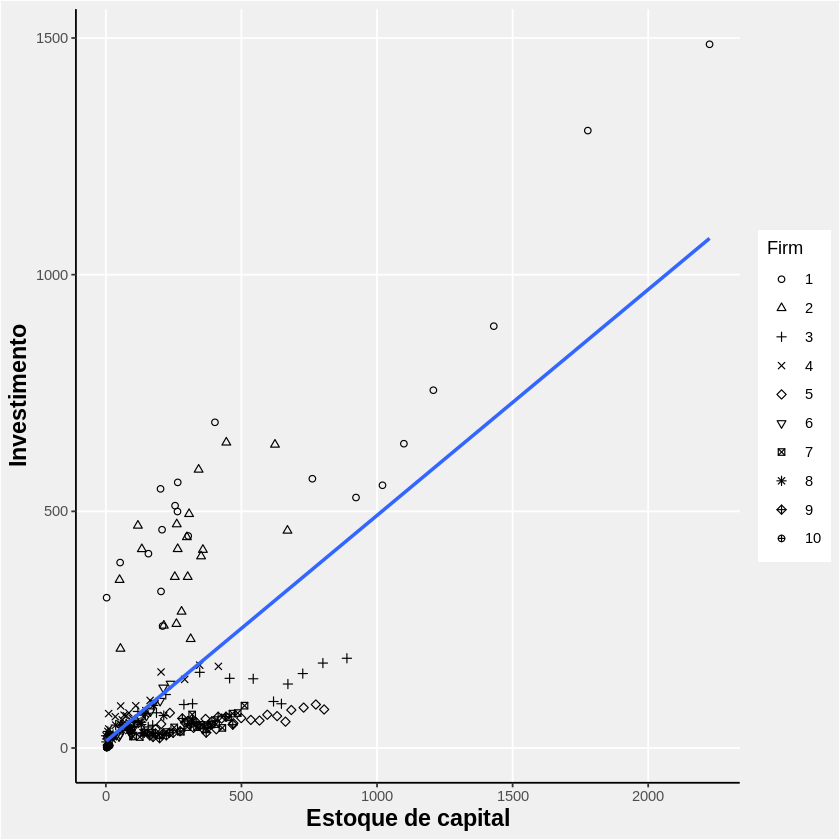

In [ ]:
ggplot(data = Grunfeld, aes(x = capital, y = inv)) +
  geom_point(aes(shape = factor(firm, levels = c(1:10)))) +
  geom_smooth(method = "lm", se = F) +
  scale_shape_manual(values = 1:10) +
  labs(x = "Estoque de capital",
       y = "Investimento",
       shape = "Firm") +
       theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white") )

Faça um gráfico do investimento por empresa ao longo do tempo:

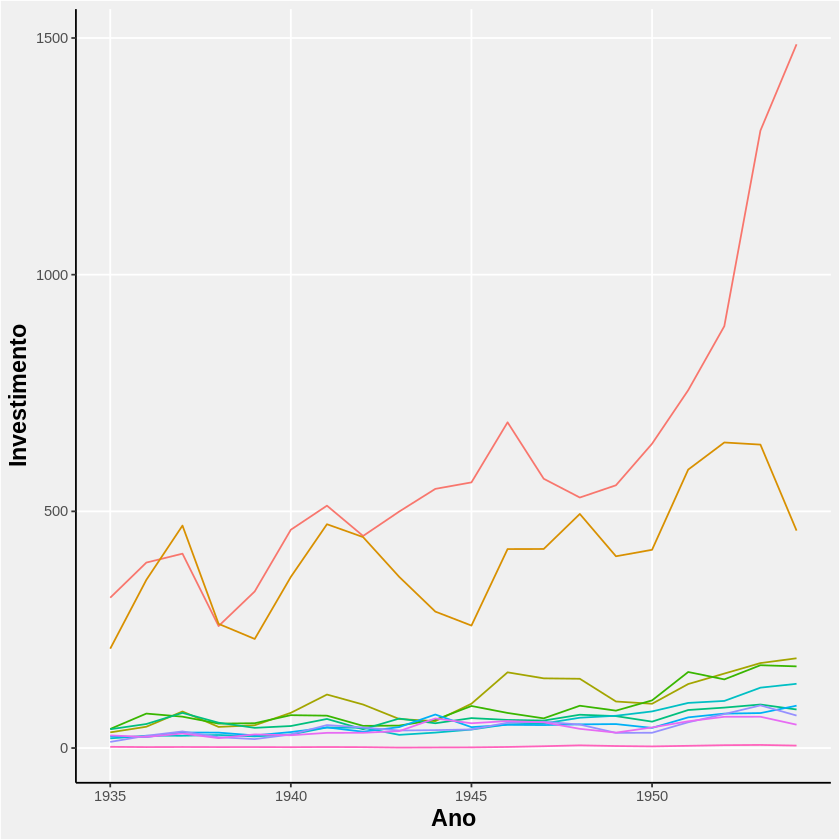

In [ ]:
ggplot(data = Grunfeld, aes(x = year, y = inv) ) +
  geom_line( aes( colour = as.factor(firm) ) ) +
  labs(x = "Ano",  y = "Investimento") +
  theme_classic() +
  theme(plot.title = element_text(size = 18, face = "bold"),
        axis.title.x = element_text(size = 14, face = "bold"),
        axis.title.y = element_text(size = 14, face = "bold")
        ) +
  theme(panel.background = element_rect(fill = "#f0f0f0"),
        plot.background = element_rect(fill = "#f0f0f0"),
        panel.grid.major = element_line(colour = "white"),
        legend.position = "none" )

## Modelo de regressão linear

Vamos estimar a regressão abaixo:

\begin{equation}
\text{ inv}_i = \beta_0 + \beta_1 \text{ capital}_i + \beta_2 \text{ value}_i + \epsilon_i
\end{equation}



In [4]:
install.packages("broom")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(broom) 

In [6]:
mqo <- lm( inv ~ capital + value, data = Grunfeld )

In [7]:
results <- tidy( mqo )

In [8]:
print( results )

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -42.7     9.51        -4.49 1.21e- 5
2 capital        0.231   0.0255       9.05 1.35e-16
3 value          0.116   0.00584     19.8  9.54e-49


Alternativa com o pacote 'plm':

In [9]:
pooled_ols_plm <- plm(inv ~ capital + value, data = Grunfeld, 
                      index = c("firm", "year"), 
                      effect = "individual", model = "pooling")

In [10]:
results <- tidy( pooled_ols_plm )

In [11]:
print( results )

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -42.7     9.51        -4.49 1.21e- 5
2 capital        0.231   0.0255       9.05 1.35e-16
3 value          0.116   0.00584     19.8  9.54e-49


Mas como sabemos que as mesmas firmas são acompanhadas ao longo do tempo, precisamos ajustar a matriz de variância-covariância para qualquer inferência sobre os coeficientes:

In [12]:
vcov_cluster <- vcovHC(pooled_ols_plm, cluster = "group")

In [13]:
pooled_ols_plm$vcov <- vcov_cluster

In [14]:
results <- tidy( pooled_ols_plm )

In [15]:
print( results )

# A tibble: 3 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -42.7     19.3        -2.22 2.79e- 2
2 capital        0.231    0.0802      2.88 4.47e- 3
3 value          0.116    0.0150      7.70 6.35e-13


Qual é a conclusão que obtemos? \
Como era de se esperar, os coeficientes foram positivos. O estimador de mínimos quadrados ordinários pode não ser a melhor escolha quando há a presença de componentes não-observáveis.

### Teste para componentes não-observáveis

Teste Breusch-Pagan:

$\mathcal{H}_0: \sigma^2_u = 0$ \\
$\mathcal{H}_a: \sigma^2_u \neq 0$ \\

In [16]:
plmtest( pooled_ols_plm, effect = "individual", 
         type = c("bp")  # Teste Breusch-Pagan                   
         )


	Lagrange Multiplier Test - (Breusch-Pagan)

data:  inv ~ capital + value
chisq = 798.16, df = 1, p-value < 2.2e-16
alternative hypothesis: significant effects


Qual é a conclusão? \

Há evidências para rejeitarmos a hipótese nula de que a variância do componente não observável seja igual à zero.

## Efeitos Fixos

#### Least Squares Dummy Variable



Vamos estimar a regressão abaixo:

\begin{equation}
\text{ inv}_{i,t} = \beta_0 + \beta_1 \text{ capital}_{i,t} + \beta_2 \text{ value}_{i,t} + u_i + \epsilon_i
\end{equation}

Primeiro, vamos estimar uma regressão com a função 'lm', mas vamos adicionar à regressão a expressão 'factor(firm)'

In [ ]:
lsdv <- lm(inv ~ capital + value + factor(firm), data = Grunfeld)

In [ ]:
results <- tidy( lsdv )

In [ ]:
print( results )

# A tibble: 12 × 5
   term           estimate std.error statistic  p.value
   <chr>             <dbl>     <dbl>     <dbl>    <dbl>
 1 (Intercept)     -70.3     49.7      -1.41   1.59e- 1
 2 capital           0.310    0.0174   17.9    2.22e-42
 3 value             0.110    0.0119    9.29   3.92e-17
 4 factor(firm)2   172.      31.2       5.53   1.08e- 7
 5 factor(firm)3  -165.      31.8      -5.20   5.14e- 7
 6 factor(firm)4    42.5     43.9       0.968  3.34e- 1
 7 factor(firm)5   -44.3     50.5      -0.878  3.81e- 1
 8 factor(firm)6    47.1     46.8       1.01   3.15e- 1
 9 factor(firm)7     3.74    50.6       0.0740 9.41e- 1
10 factor(firm)8    12.8     44.1       0.289  7.73e- 1
11 factor(firm)9   -16.9     48.5      -0.349  7.27e- 1
12 factor(firm)10   63.7     50.3       1.27   2.07e- 1


Vamos repetir a regressão, mas vamos adicionar '-1' à regressão para removermos o intercepto:

In [ ]:
lsdv <- lm(inv ~ capital + value + factor(firm) -1, data = Grunfeld)

In [ ]:
results <- tidy( lsdv )

In [ ]:
print( results )

# A tibble: 12 × 5
   term           estimate std.error statistic  p.value
   <chr>             <dbl>     <dbl>     <dbl>    <dbl>
 1 capital           0.310    0.0174    17.9   2.22e-42
 2 value             0.110    0.0119     9.29  3.92e-17
 3 factor(firm)1   -70.3     49.7       -1.41  1.59e- 1
 4 factor(firm)2   102.      24.9        4.09  6.49e- 5
 5 factor(firm)3  -236.      24.4       -9.64  3.95e-18
 6 factor(firm)4   -27.8     14.1       -1.98  4.97e- 2
 7 factor(firm)5  -115.      14.2       -8.09  7.14e-14
 8 factor(firm)6   -23.2     12.7       -1.83  6.91e- 2
 9 factor(firm)7   -66.6     12.8       -5.18  5.63e- 7
10 factor(firm)8   -57.5     14.0       -4.11  5.85e- 5
11 factor(firm)9   -87.2     12.9       -6.77  1.63e-10
12 factor(firm)10   -6.57    11.8       -0.555 5.79e- 1


### Estimador de efeitos fixos

Vamos estimar o modelo com efeitos fixos, considerando a estrutura de dados em painel. Para isso, vamos utilizar a função 'plm' (como fizemos acima no caso do "pooled OLS", mas agora chamaremos o modelo de 'within': Após a estimativa, utilize o comando 'summary' para obter os resultados.

In [ ]:
fe_model_plm <- plm(inv ~ capital + value, data = Grunfeld, 
                    index = c("firm", "year"), 
                    effect = "individual", model = "within")

In [ ]:
summary( fe_model_plm )

Oneway (individual) effect Within Model

Call:
plm(formula = inv ~ capital + value, data = Grunfeld, effect = "individual", 
    model = "within", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-184.00857  -17.64316    0.56337   19.19222  250.70974 

Coefficients:
        Estimate Std. Error t-value  Pr(>|t|)    
capital 0.310065   0.017355 17.8666 < 2.2e-16 ***
value   0.110124   0.011857  9.2879 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2244400
Residual Sum of Squares: 523480
R-Squared:      0.76676
Adj. R-Squared: 0.75311
F-statistic: 309.014 on 2 and 188 DF, p-value: < 2.22e-16

Vamos testar se a adição de um componente sistemático gera efeitos significativos:

In [ ]:
pFtest( fe_model_plm, pooled_ols_plm ) #o primeiro deve ser o modelo com efeitos fixos e o segundo o pooled OLS


	F test for individual effects

data:  inv ~ capital + value
F = 49.177, df1 = 9, df2 = 188, p-value < 2.2e-16
alternative hypothesis: significant effects


### Efeitos aleatórios

Vamos estimar o modelo com efeitos aleatórios, considerando a estrutura de dados em painel. Para isso, vamos utilizar a função 'plm' (como fizemos acima, tanto no caso do "pooled OLS", como com os "efeitos fixos", mas agora chamaremos o modelo de 'random': Após a estimativa, utilize o comando 'summary' para obter os resultados.

In [ ]:
re_model_plm <- plm(inv ~ capital + value, data = Grunfeld, 
                    index = c("firm", "year"), 
                    effect = "individual", model = "random")

In [ ]:
summary(re_model_plm)

Oneway (individual) effect Random Effect Model 
   (Swamy-Arora's transformation)

Call:
plm(formula = inv ~ capital + value, data = Grunfeld, effect = "individual", 
    model = "random", index = c("firm", "year"))

Balanced Panel: n = 10, T = 20, N = 200

Effects:
                  var std.dev share
idiosyncratic 2784.46   52.77 0.282
individual    7089.80   84.20 0.718
theta: 0.8612

Residuals:
     Min.   1st Qu.    Median   3rd Qu.      Max. 
-177.6063  -19.7350    4.6851   19.5105  252.8743 

Coefficients:
              Estimate Std. Error z-value Pr(>|z|)    
(Intercept) -57.834415  28.898935 -2.0013  0.04536 *  
capital       0.308113   0.017180 17.9339  < 2e-16 ***
value         0.109781   0.010493 10.4627  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    2381400
Residual Sum of Squares: 548900
R-Squared:      0.7695
Adj. R-Squared: 0.76716
Chisq: 657.674 on 2 DF, p-value: < 2.22e-16

Efeitos fixos ou aleatórios?

Teste de Hausman:

$\mathcal{H}_0: \rho \big(u, \epsilon \big) = 0$ \\
$\mathcal{H}_a: \rho \big(u, \epsilon \big) \neq 0$ \\

In [ ]:
phtest( fe_model_plm, re_model_plm )


	Hausman Test

data:  inv ~ capital + value
chisq = 2.3304, df = 2, p-value = 0.3119
alternative hypothesis: one model is inconsistent


O que podemos concluir? \

Não há evidências para rejeitarmos a hipótese de que os erros não são correlacionados com o componente não observável, resultado que favorece o uso do modelo com efeitos aleatórios.